# Метод Монте-Карло

Судь метода в том, что при многократном повторении эксперимента, распределение его значений приближается к вероятностям наступления данных событий.
- Метод очень удобен, когда надо решить сложную задачу с использованием вероятностей или проверить результаты, полученные по формуле.

### Задача: 
- В комнате собрались 23 человека. Какая вероятность, что кого-то из этих людей совпали дни рождения? (парадокс дней рождений)

In [26]:
import pandas as pd
import numpy as np
from math import factorial

In [13]:
dr = pd.Series(range(365)) # создаем список с возможными днями рождения
coincidence = [dr.sample(23, replace=True).duplicated().max() for _ in range(10000)] #duplicated() ищет дубликаты 
                                                                                     # в полученном списке
pd.Series(coincidence).mean()

0.501

Задача имееет аналитическое решение:
- Будем отталкиваться от дополняющей вероятности, т.е. что дни рождения ни у кого не совпали
- Дополняющая вероятность считается так: 364/365 * (363/365) *...* ((365-n+1)/365)  =  365! / (365-n)! / 365**n

In [28]:
1-factorial(365)/factorial(365-23)/365**23

0.5072972343239854

### Задача: 
- Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?

In [33]:
np.random.binomial(1, 0.15) #генератор, который выдает '1' (синее такси) в 15% случаев (т.к. Синих 15%)

np.random.binomial(1, 0.8) # генератор, который имитирует показание свидетеля при синей машине
np.random.binomial(1, 0.2) # генератор, который имитирует показание свидетеля при зеленой машине

0

In [36]:
witness = [] # список со значениями, когда свидетель сказал, что видел синюю машину
real = [] # список со значениями, когда свидетель сказал, что видел синюю машину и она действительно была синей
for _ in range(100000):
    if np.random.binomial(1, 0.15) ==1: # машина синяя
        witness.append(np.random.binomial(1, 0.8)) # свидетель прав только в 80% случаев
        real.append(np.random.binomial(1, 0.8))
    else: # машина зеленая
        witness.append(np.random.binomial(1, 0.2)) # свидетель не прав в 20%
        real.append(0) # тут 0, т.к. мы знаем, что машина была зеленая np.random.binomial(1, 0.15) ==0
pd.Series(real).sum() / pd.Series(witness).sum() 

0.4137357496794761

Сама задача довольно легко решается аналитически. Из 100 случаев аварий, в 85 будут участвовать зеленые машины, в 15 - синие.
- Свидетель угадает 15 х 0.8 синих машин = 12
- Но ошибется в 85*0.2 = 17 машинах.
- Вероятность, что названное свиделем такси действительно синее: 12/(12+17) = 0.413

### Задача:
- Вирус XYZ находят в среднем у одного человека из тысячи. Существует тест, показывающий, заражён человек XYZ или нет. Однако этот тест в 5% даёт ложное срабатывание — показывает факт заражения, когда на самом деле человек здоров.
- Предположим, что тестирование взятого наугад человека показало, что он XYZ-инфицирован. Какова вероятность того, что он на самом деле болен?

In [63]:
test = [] # случаи положительного срабатывания теста
real = [] # случаи, когда человек реально был заражен

for _ in range(100000):
    if np.random.binomial(1, 0.001) ==1: # вероятность,что человек болен 0.1% (1/1000)
        test.append(np.random.binomial(1, 0.95)) # тест определит больного человека в 95% случаев
        real.append(np.random.binomial(1, 0.95))
    else: # человек здоров
        test.append(np.random.binomial(1, 0.05)) # тест может быть ложноположительным
        real.append(0) # тут 0, т.к. мы знаем, что человек здоров
pd.Series(real).sum() / pd.Series(test).sum() 

0.018525741029641187

Аналитическое решение тут аналогичное предыдущей задаче:
- Мы провели 1000 тестирований. Согласно условию задачи, у нас должен быть 1 зараженный человек и 999 здоровых. И выявим мы этого зараженного в 95% случаев, т.е. 1 х 0.95
- При проведении тестирования, тест покажет положительный результат: 1 х 0.95(тот самый зараженный) + 999 х 0.05(ложные срабатывания) = 50.9 человек
- Отношение 1*0.95 к 50.9 и будет нашей вероятностью (0.0186)

В целом эти решения связаны с условной вероятностью и описываются формулой Байеса:

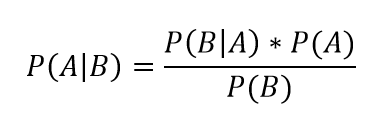

In [56]:
# P(A|B) - вероятность, что человек болен(A) при условии, что тест дал положительный результат (В)
# P(B|A) = 0.95 - тест правильно определяет заболевшего в 95% случаев
# P(A) = 0.001 - вероятность, что человек болен
# P(B) = 0.001*0.95(болен) + 0.999*0.05(здоров, ложноположительный)
0.95*0.001/(0.95*0.001+0.05*0.999)

0.018664047151277015

### Задача
- Студет выучил 20 билетов из 30. Изменится ли вероятность сдачи экзамена, если он пойдет в класс не первым, а вторым?

In [65]:
student = list(range(1,21)) # то, что знает студент
tickets = list(range(1,31)) # все билеты
student

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [83]:
from random import shuffle
n=100000
counter = 0
for _ in range(n):
    tickets = list(range(1,31))
    shuffle(tickets)
    if tickets[0] in student:
        counter +=1
print(counter/n)      

0.66656


In [87]:
n=100000
counter = 0
for _ in range(n):
    tickets = list(range(1,31))
    shuffle(tickets)
    tickets.pop(0) # кто-то пошел первым и вытянул один билет
    shuffle(tickets)
    if tickets[0] in student:
        counter +=1
print(counter/n) 

0.6658


Аналитическое решение:
- Вероятность, что студен сдаст экзамен, если пойдет первым: 20/30 = 0.666
- Если студент пойдет вторым, то вероятность сдачи: 2/3*(19/29) + (1/3)*20/29 = 0.666 (здесь 2/3 - это вероятность, что первый студент вытащит билет, который знает второй студент 20/30)